# Análisis exploratorio de datos del suministro de agua de la CDMX

Análisis exploratorio de datos del suministro de agua de la Ciudad de México a septiembre de 2020. Este análisis fue efectuado empleando la información bimestral por el concepto de suministro de agua a nivel manzana, considerando la facturación por servicio de consumo medido y promedio otorgada por el Gobierno de la Ciudad de México y disponible [en el portal de Datos Abiertos Ciudad de México](https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/information/). 

Este análisis fue efecutado por el equipo de Ciencia de Datos conformado por:
* Carlos Bautista (125761)
* Enrique Ortiz (150644)
* Mario Heredia (197863)
* José Antonio Lechuga (192610)

## Contenido

En el presente reporte se abordan las siguientes preguntas y actividades:
* Exploración inicial
    * Generación de código exploratorio
    * ¿Cuántas variables existen?
    * ¿Cuántas observaciones existen?
    * ¿Cuántas observaciones únicas se tienen por variable?
    * ¿Cuántas variables numéricas existen?
    * ¿Cuántas variables de fecha existen?
    * ¿Cuántas variables categóricas existen?
    * ¿Cuántas variables de texto hay?
    * Generación del profiling de cada variable.
    * ¿Qué se conoce hasta ahora de este set de datos por variable?
    * ¿Cuántas alcadías hay? ¿Cuántos `nomgeo` existen? ¿Se identifica algún error?
* Limpieza y manipulación de datos
    * Generación de código de limpieza y manipulación
    * Transformación del nombre de las columnas a formato estándar: minúsculas, sin espacios en blanco (cambiar por guiones bajos) y sin signos de puntuación.
    * Agregar la variable `latitud` y `longitud` generadas a partir de la columna `geo_point`.
    * Transformar la variable latitud y longitud a numérica.
    * Eliminar la columna `geo_point`.
    * Eliminar la columna `geo_shape`.
    * Cambiar a minúsculas las columnas `alcaldia`, `colonia` e `indice_des`.
    * Efectuar nuevamente el proceso de identificación de variables numéricas, categóricas, texto y fechas.
    * Generación del profiling de cada variable.

## Exploración inicial

### Generación de código exploratorio

In [22]:
# verificando versiones
import datetime
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
sys.version

'3.7.4 (default, Sep 21 2020, 18:15:00) \n[GCC 9.3.0]'

In [7]:
def numero_variables_observaciones(data):
    observaciones, variables = data.shape
    print(f"Tenemos {observaciones} observaciones para {variables} variables.")
    
def contar_variables_numericas(data):
    # con 'data.dtypes' podemos ver todos los tipos de variables 
    numeric = [e for e in data.dtypes.values if e == "float64" or e == "int64"]
    print(f"Tenemos {len(numeric)} variables numéricas.")
    
def contar_variables_fecha(data):   
    date_variables = [e for e in data.dtypes.values if type(e) is datetime.date]
    print(f"Tenemos {len(date_variables)} variables de fecha.")
    
def generar_data_profiling(title, path):
    profile = ProfileReport(data, title=title)
    profile.to_file(output_file=path)
    return profile

def numero_valores_unicos(data, column):
    if column not in data.columns:
        print("Nombre de columna invalido")
    else:
        return len(data[column].unique())

In [8]:
# cambiar a donde se encuentre el archivo csv con los datos requeridos
data_path = 'datos/consumo-agua.csv'

In [9]:
data = pd.read_csv(data_path)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

### ¿Cuántas variables existen? ¿Cuántas observaciones existen?

In [10]:
numero_variables_observaciones(data)

Tenemos 71102 observaciones para 17 variables.


In [11]:
data.head()

,Geo Point,Geo Shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.24,631.00,42.066667,3.05,3,3.05,57250,ALTO
1,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,115.13,28.782500,7.32,3,7.32,57253,MEDIO
2,"19.4557195871,-99.1135822797","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,197.96,32.993333,75.03,3,75.03,57255,POPULAR
3,"19.4596467168,-99.1044693641","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.00,253.53,84.510000,84.51,3,253.53,57267,BAJO
4,"19.4741606185,-99.1467497317","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.72,839.35,76.304545,121.57,3,243.14,57330,BAJO


### ¿Cuántas observaciones únicas se tienen por variables? 


In [7]:
data.nunique()

Geo Point               22930
Geo Shape               22922
consumo_total_mixto     24339
anio                        1
nomgeo                     17
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
dtype: int64

### ¿Cuántas variables numéricas existen? 

In [8]:
# podemos ver todos los tipos de variables
data.dtypes

Geo Point                object
Geo Shape                object
consumo_total_mixto     float64
anio                      int64
nomgeo                   object
consumo_prom_dom        float64
consumo_total_dom       float64
alcaldia                 object
colonia                  object
consumo_prom_mixto      float64
consumo_total           float64
consumo_prom            float64
consumo_prom_no_dom     float64
bimestre                  int64
consumo_total_no_dom    float64
gid                       int64
indice_des               object
dtype: object

In [9]:
contar_variables_numericas(data)

Tenemos 11 variables numéricas.


### ¿Cuántas variables de fecha tenemos? 

Ninguna. Se puede ver en la impresión de dtypes. La variable `anio` indica el año, pero eso no es suficiente para ser una fecha (no califica como date, time o datetime). 

In [10]:
contar_variables_fecha(data)

Tenemos 0 variables de fecha.


### ¿Cuántas variables categóricas existen? 

Las siguientes pueden ser consideradas variables categóricas: `nomgeo`, `alcaldia`, `colonia`, e `indice_des`. `bimestre` fue contada como numérica, pero es cierto que puede ser analizada como categórica, al igual que año (dado que solo hay cifras para 2019). Por lo tanto, tenemos entre 4 y 6 variables categóricas, dependiendo de si tomamos a bimestre y año como categórica o no.  

### ¿Cuántas variables de texto hay? 

Aunque `nomgeo`, `alcaldia`, `colonia` e `indice_des` son texto, no contienen como tal texto a analizar (como palabras u oraciones). Diríamos que son categóricas.

### Generación del profiling de cada variable

In [11]:
initial_profile = generar_data_profiling('Profiling inicial de consumo de agua', 'reportes/profiling_inicial.html')

### ¿Qué se conoce hasta ahora de este set de datos por variable?

* `Geo Point` indica la latitud y longitud de la colonia. 
* `Geo Shape` es un diccionario con información geográfica. 
* `nomgeo` y `alcaldia` son equivalentes (e indican el nombre de la alcaldía). Hay 16 distintos. 
* `colonia` indica el nombre de la colonia.
* `anio` indica el año, y solo hay datos para 2019.
* `bimestre` indica el bimestre del año, y solo hay datos para el bimestre 1, 2 y 3. 

### ¿Cuántas alcaldías hay? ¿Cuántos `nomgeo` existen? ¿Se identifica algún error? 

In [12]:
no_alcaldias = numero_valores_unicos(data, 'alcaldia')
no_nomgeo = numero_valores_unicos(data, 'nomgeo')
print(f'Se tiene {no_alcaldias} alcaldías únicas y {no_nomgeo} nomgeo únicos.')

Se tiene 16 alcaldías únicas y 17 nomgeo únicos.


Sí el error está en la variable nomgeo: se registró "Talpan" en vez de "Tlalpan". 

In [13]:
[e for e in data.nomgeo.unique() if e.endswith('pan')]

['Talpan', 'Tlalpan']

## Limpieza y manipulación de datos

### Generación de código de limpieza y manipulación

In [12]:
def standarize_column_names(data, excluded_punctuation=".,-*¿?¡!"):
    data.columns = data.columns.str.lower().str.replace(" ", "_")
    for ch in excluded_punctuation:
        data.columns = data.columns.str.replace(ch, "")
        
        
def standarize_column_strings(data, columns, excluded_punctuation=".,-*¿?¡!"):
    for col in columns:
        data[col] = data[col].apply(lambda x: x.lower().replace(" ", "_"))
        data[col] = data[col].apply(lambda x: x.lower().replace("á", "a"))
        data[col] = data[col].apply(lambda x: x.lower().replace("é", "e"))
        data[col] = data[col].apply(lambda x: x.lower().replace("í", "i"))
        data[col] = data[col].apply(lambda x: x.lower().replace("ó", "o"))
        data[col] = data[col].apply(lambda x: x.lower().replace("ú", "u"))
        data[col] = data[col].apply(lambda x: x.lower().replace("ü", "u"))
        for ch in excluded_punctuation:
            data[col] = data[col].apply(lambda x: x.replace(ch, ""))
    
def replace_column_value(data, column, search_string, replace_string):
    data[column] = data[column].apply(lambda x: x.replace(search_string, replace_string))
    
    
def clean_data_from(path):
    """
    Función para realizar todas las transformaciones necesarias requeridas al 
    dataset del consumo de agua. 
    
    Inputs:
    -------
    
    path: str
          El path en tu compu donde está el archivo csv. ("/Users/etc/etc..")
    
    Returns:
    --------
    
    data: pandas dataframe
          Un dataframe en el formato correcto
    
    """
    #1. cargar la info y arreglar nombres de columnas
    data = pd.read_csv(path)
    standarize_column_names(data)
    
    #2. Transformar alcaldia, colonia, indice_des y nomgeo
    col_text = ["alcaldia", "colonia", "indice_des", "nomgeo"]
    standarize_column_strings(data, col_text)
    
    #3. Agregar latitud y longitud en formato numérico
    latitud = [float(e.split(",")[0]) for e in data["geo_point"]] 
    longitud = [float(e.split(",")[1]) for e in data["geo_point"]]
    data["latitud"] = latitud 
    data["longitud"] = longitud
    
    #4. Tirar variables irrelevantes
    data.drop(columns = ["geo_point", "geo_shape"], inplace = True)
    
    #5. Quitar el error de Talpan
    replace_column_value(data, 'nomgeo', 'talpan', 'tlalpan')
    
    #6. Homologar nombres entre nomgeo y alcaldia
    replace_column_value(data, 'nomgeo', 'cuajimalpa_de_morelos', 'cuajimalpa')
    replace_column_value(data, 'nomgeo', 'la_magdalena_contreras', 'magdalena_contreras')
    
    return data

### Transformación del nombre de las columnas a formato estándar

In [13]:
standarize_column_names(data)
data.head()

,geo_point,geo_shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.24,631.00,42.066667,3.05,3,3.05,57250,ALTO
1,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,115.13,28.782500,7.32,3,7.32,57253,MEDIO
2,"19.4557195871,-99.1135822797","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,197.96,32.993333,75.03,3,75.03,57255,POPULAR
3,"19.4596467168,-99.1044693641","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.00,253.53,84.510000,84.51,3,253.53,57267,BAJO
4,"19.4741606185,-99.1467497317","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.72,839.35,76.304545,121.57,3,243.14,57330,BAJO


### Agregar la variable latitud y longitud generadas a partir de `geopoint`. Transformar la variable latitud y longitud a numérica.

In [14]:
# sin lo de "float" lo toma como "object"
latitud = [float(e.split(",")[0]) for e in data["geo_point"]] 
longitud = [float(e.split(",")[1]) for e in data["geo_point"]]
 
data["latitud"] = latitud 
data["longitud"] = longitud

data.dtypes

geo_point                object
geo_shape                object
consumo_total_mixto     float64
anio                      int64
nomgeo                   object
consumo_prom_dom        float64
consumo_total_dom       float64
alcaldia                 object
colonia                  object
consumo_prom_mixto      float64
consumo_total           float64
consumo_prom            float64
consumo_prom_no_dom     float64
bimestre                  int64
consumo_total_no_dom    float64
gid                       int64
indice_des               object
latitud                 float64
longitud                float64
dtype: object

### Eliminar la columna `geo_point` y `geo_shape`

In [15]:
data.drop(columns = ["geo_point", "geo_shape"], inplace = True)
data.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.24,631.00,42.066667,3.05,3,3.05,57250,ALTO,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,115.13,28.782500,7.32,3,7.32,57253,MEDIO,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,197.96,32.993333,75.03,3,75.03,57255,POPULAR,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.00,253.53,84.510000,84.51,3,253.53,57267,BAJO,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.72,839.35,76.304545,121.57,3,243.14,57330,BAJO,19.474161,-99.146750


### Cambiar a minúsculas las columnas alcaldía, colonia e indice_des.

In [16]:
col_text = ["alcaldia", "colonia", "indice_des"]
standarize_column_strings(data, col_text)
data.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo_a_madero,7_de_noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo_a_madero,7_de_noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo_a_madero,7_de_noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo_a_madero,nueva_tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


### Efectuar nuevamente el proceso de identificación de variables numéricas, categóricas, texto y fechas

* **Variables numéricas:** 
    * `consumo_total_mixto`
    * `anio` (de nuevo, que puede ser contada como categórica)
    * `consumo_promo_dom`
    * `consumo_total_dom`
    * `consumo_prom_mixto`
    * `consumo_total`
    * `consumo_prom`
    * `consumo_prom_no_dom`
    * `consumo_total_no_dom`
    * `gid`
    * `bimestre` (una vez mas) puede ser o no contada como numérica

* **Variables de fecha:** ninguna. 

* **Variables de texto:** 
    * `latitud` y `longitud` son texto para pandas, aunque en realidad son coordenadas
    * No hay variables que contengan texto a analizar

* **Variables categóricas:** 
    * `nomgeo`
    * `alcaldia`
    * `colonia`
    * `indices_des`
    * `bimestre`

In [17]:
contar_variables_numericas(data)
contar_variables_fecha(data)

Tenemos 13 variables numéricas.
Tenemos 0 variables de fecha.


In [18]:
replace_column_value(data, 'nomgeo', 'Talpan', 'Tlalpan')
data.nomgeo.unique()

array(['Gustavo A. Madero', 'Azcapotzalco', 'Coyoacán', 'Tlalpan',
       'Milpa Alta', 'Álvaro Obregón', 'Cuajimalpa de Morelos', 'Tláhuac',
       'La Magdalena Contreras', 'Xochimilco', 'Iztapalapa', 'Iztacalco',
       'Benito Juárez', 'Miguel Hidalgo', 'Cuauhtémoc',
       'Venustiano Carranza'], dtype=object)

In [19]:
data.nomgeo.nunique()

16

### Genera el data profiling por variable. 

In [22]:
final_profile = generar_data_profiling('Profiling final de consumo de agua', 'reportes/profiling_final.html')

In [20]:
# prueba de funcion de limpieza global
data = clean_data_from(data_path)
data.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,gustavo_a_madero,42.566364,468.23,gustavo_a_madero,7_de_noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,gustavo_a_madero,35.936667,107.81,gustavo_a_madero,7_de_noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,gustavo_a_madero,24.586000,122.93,gustavo_a_madero,7_de_noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,gustavo_a_madero,0.000000,0.00,gustavo_a_madero,nueva_tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


# EXPOSICIÓN

# Data Profiling

## Errores los datos

Con el objetivo de detectar posibles en los datos, se contestaron las siguientes preguntas:
* ¿Existen consumos negativos?
* ¿Existen valores igual a cero para el consumo?
* ¿Existen observaciones donde la suma de los consumos no equivalga al consumo total?
* ¿Existen observaciones donde el total de manzanas no sea la suma de los 3 tipos de manzana?
* ¿En cuántas observaciones no coinciden los valores de `alcaldia` y `nomgeo`?

### ¿Existen consumos negativos?

In [24]:
consumos = ['consumo_total_mixto', 'consumo_prom_mixto', 
            'consumo_total_dom', 'consumo_prom_dom',
            'consumo_total_no_dom', 'consumo_prom_no_dom',
            'consumo_total', 'consumo_prom']

print("número de datos con valores negativos")
for consumo in consumos:
    print(f"{consumo}: {len(data[data[consumo] < 0])}")

número de datos con valores negativos
consumo_total_mixto: 0
consumo_prom_mixto: 0
consumo_total_dom: 0
consumo_prom_dom: 0
consumo_total_no_dom: 0
consumo_prom_no_dom: 0
consumo_total: 0
consumo_prom: 0


| Tipo de consumo               | Porcentaje |
|-------------------------------|------------|
| Consumo total mixto           | 0          |
| Consumo promedio mixto        | 0          |
| Consumo total domestico       | 0          |
| Consumo promedio domestico    | 0          |
| Consumo total no domestico    | 0          |
| Consumo promedio no domestico | 0          |
| Consumo total                 | 0          |
| Consumo total promedio        | 0          |

## ¿Existen valores igual a cero para el consumo?

In [25]:
print("porcentaje de datos con valores igual a cero")
for consumo in consumos:
    print(f"{consumo}: {round(len(data[data[consumo] == 0]) / len(data[consumo]) * 100, 1)}")

porcentaje de datos con valores igual a cero
consumo_total_mixto: 24.9
consumo_prom_mixto: 24.9
consumo_total_dom: 13.9
consumo_prom_dom: 13.9
consumo_total_no_dom: 11.4
consumo_prom_no_dom: 11.4
consumo_total: 3.4
consumo_prom: 3.4


| Tipo de consumo               | Porcentaje |
|-------------------------------|------------|
| Consumo total mixto           | 24.9       |
| Consumo promedio mixto        | 24.9       |
| Consumo total domestico       | 13.9       |
| Consumo promedio domestico    | 13.9       |
| Consumo total no domestico    | 11.4       |
| Consumo promedio no domestico | 11.4       |
| Consumo total                 | 3.4        |
| Consumo total promedio        | 3.4        |

Es posible verificar que para cada tipo de consumo, el número de observaciones faltantes es el mismo tanto para el dato de total como para el promedio.

## ¿Existen observaciones donde la suma de los consumos no equivalga al consumo total?

Debido a que el consumo total (i.e. `consumo_total`) se calcula de la siguiente manera:

$$consumo\_total = consumo\_total\_domestico + consumo\_total\_no\_domestico + consumo\_total\_mixto$$ 

se comprobó el número de observaciones que divergían de dicho cálculo obteniendo los siguientes resultados:

In [26]:
data_sin_na = data[data.consumo_total_mixto.notna() & data.consumo_prom_mixto.notna()
                   & data.consumo_total_dom.notna() & data.consumo_prom_dom.notna()
                   & data.consumo_total_no_dom.notna() & data.consumo_prom_no_dom.notna()
                   & data.consumo_total.notna() & data.consumo_prom.notna()
                  ]
data_sin_na.shape

(62214, 17)

### ¿Cúantos valores divergen al nivel de unidades?

In [27]:
len(data_sin_na[
    data_sin_na.consumo_total - 
    (data_sin_na.consumo_total_dom 
     + data_sin_na.consumo_total_mixto
     + data_sin_na.consumo_total_no_dom) > 1])

0

### ¿Cúantos valores divergen al nivel de décimas?

In [28]:
len(data_sin_na[
    data_sin_na.consumo_total - 
    (data_sin_na.consumo_total_dom 
     + data_sin_na.consumo_total_mixto
     + data_sin_na.consumo_total_no_dom) > 0.1])

6

### ¿Cúantos valores divergen al nivel de centésimas?

In [29]:
len(data_sin_na[
    data_sin_na.consumo_total - 
    (data_sin_na.consumo_total_dom 
     + data_sin_na.consumo_total_mixto
     + data_sin_na.consumo_total_no_dom) > 0.01])

149

## ¿Existen observaciones donde el total de manzanas no sea la suma de los 3 tipos de manzana?

Considerando a los consumos promedios como:

$$ consumo\_promedio = \frac{consumo\_total}{no\_manzanas} $$

Se comprobó que el número total de manzanas equivalga a la suma de las manzanas domésticas, no domésticas y mixtas obteniendo los siguientes resultados:

In [30]:
manzanas = round(data_sin_na.consumo_total / data_sin_na.consumo_prom)
manzanas_dom = round(data_sin_na.consumo_total_dom / data_sin_na.consumo_prom_dom)
manzanas_no_dom = round(data_sin_na.consumo_total_no_dom / data_sin_na.consumo_prom_no_dom)
manzanas_mixto = round(data_sin_na.consumo_total_mixto / data_sin_na.consumo_prom_mixto)

manzanas.fillna(0, inplace=True)
manzanas_dom.fillna(0, inplace=True)
manzanas_no_dom.fillna(0, inplace=True)
manzanas_mixto.fillna(0, inplace=True)

In [31]:
manzanas_df = pd.DataFrame(data={
    'tot': manzanas,
    'dom': manzanas_dom,
    'no_dom': manzanas_no_dom,
    'mixto': manzanas_mixto
})

In [32]:
manzanas_df['delta'] = manzanas_df.tot - (manzanas_df.dom + manzanas_df.no_dom + manzanas_df.mixto)

### ¿En cuántas observaciones el número de manzanas no cuadra?

In [33]:
len(manzanas_df[manzanas_df.delta != 0])

5650

### ¿Qué porcentaje representa?

In [34]:
print(f"{round(len(manzanas_df[manzanas_df.delta != 0]) / len(manzanas_df), 3) * 100}%")

9.1%


### ¿Cómo se distribuyen?

In [35]:
conteo_deltas = manzanas_df.delta.value_counts()
deltas_df = pd.DataFrame(data={
    'diferencia': conteo_deltas.index,
    'observaciones': conteo_deltas.values})

deltas_df["fraccion"] = round(deltas_df.observaciones / sum(deltas_df.observaciones), 3) * 100

deltas_df.sort_values(["diferencia"])

,diferencia,observaciones,fraccion
0,0.0,56564,90.9
1,1.0,4742,7.6
2,2.0,707,1.1
3,3.0,139,0.2
4,4.0,34,0.1
5,5.0,16,0.0
9,6.0,1,0.0
6,7.0,6,0.0
7,8.0,3,0.0
8,16.0,2,0.0


## Datos faltantes

Con base en los resultados obtenidos del Data Profiling, generamos un cuadro que condense la información sobre las variables que contienen *missing values*. Podemos observar que estas variables se refieren a algún tipo de consumo, en específico las de consumo mixto y consumo doméstico. 

Dado que el resto de variables tienen información completa para el total de las observaciones, podríamos sospechar que los missing values se expliquen por manzanas donde no existe ese tipo de consumo particular.

In [36]:
mv_df = pd.DataFrame(data=[[1,'consumo_total_mixto',data['consumo_total_mixto'].isna().sum(),round(data['consumo_total_mixto'].isna().sum()/data.shape[0]*100,1)],
                       [2,'consumo_prom_mixto',data['consumo_prom_mixto'].isna().sum(),round(data['consumo_prom_mixto'].isna().sum()/data.shape[0]*100,1)],
                       [3,'consumo_total_dom',data['consumo_total_dom'].isna().sum(),round(data['consumo_total_dom'].isna().sum()/data.shape[0]*100,1)],
                       [4,'consumo_prom_dom',data['consumo_prom_dom'].isna().sum(),round(data['consumo_prom_dom'].isna().sum()/data.shape[0]*100,1)]],
                 columns=['id', 'variable', 'total', 'porcentaje'])
mv_df       

,id,variable,total,porcentaje
0,1,consumo_total_mixto,8327,11.7
1,2,consumo_prom_mixto,8327,11.7
2,3,consumo_total_dom,4820,6.8
3,4,consumo_prom_dom,4820,6.8


Recordamos que el consumo total de una manzana se compone de la suma de las tomas de agua de tipo doméstico, no doméstico y mixto.
Esto lo podemos comprobar, y si ambas sumas son iguales, podríamos afirmar que los missing values efectivamente corresponden a manzanas donde no existen tomas de dichas características.

In [37]:
con_tot_comp =round(data['consumo_total_mixto'].sum() + data['consumo_total_dom'].sum() + data['consumo_total_no_dom'].sum(),0)
con_tot = round(data['consumo_total'].sum(),0)
print(con_tot,con_tot_comp)

120578129.0 120578129.0


Y efectivamente vemos que las sumas coinciden y que la diferencia es cero:

In [38]:
con_tot - con_tot_comp

0.0

Grafica

# Comportamiento del consumo bimestral

Con el objetivo de detectar posibles en los datos, se contestaron las siguientes preguntas:

* ¿De cuántos bimestres tenemos información?
* ¿Cúantas observaciones se tienen por bimestre?
* ...
* ...

### ¿De cuántos bimestres tenemos información?

In [39]:
data.bimestre.nunique()

3

### ¿Cúantas observaciones se tienen por bimestre?

In [40]:
conteo_bimestres = data.bimestre.value_counts()
bim_df = pd.DataFrame(data={'bimestre': conteo_bimestres.index, 'observaciones': conteo_bimestres.values})
bim_df.sort_values(by=['bimestre'], inplace=True, ignore_index=True)
bim_df

,bimestre,observaciones
0,1,23338
1,2,23942
2,3,23822


# Estudio de alcaldías y colonias de la CDMX

Para analizar las colonias de la Ciudad de México se contestaron las siguientes preguntas:

* ¿Cuántas alcaldías existen?
* ¿En cuántas observaciones no coinciden los valores de `alcaldia` y `nomgeo`?
* ¿Se tienen números de observaciones similares para cada alcadía?
* ¿Cuántas colonias diferentes existen?
* ¿Cuántas colonias se tienen por alcaldía?
* ¿Coincide este dato con los datos oficiales?
* ¿Cuantás colonias existen por índice de desarrollo?

### ¿Cuántas alcaldías existen?

In [41]:
no_alcaldias = len(data.alcaldia.unique())
print(f"Existen {no_alcaldias} alcaldías diferentes")

Existen 16 alcaldías diferentes


In [42]:
print(f"Existen {len(data.nomgeo.unique())} valores para 'nomgeo' diferentes")

Existen 16 valores para 'nomgeo' diferentes


### ¿En cuántas observaciones no coinciden los valores de `alcaldia` y `nomgeo`?

In [43]:
len(data[data.nomgeo != data.alcaldia])

0

### ¿Se tienen números de observaciones similares para cada alcadía?

![Observaciones por alcadía](plots/colonias/barras_observaciones_alcaldia.png)

### ¿Cuántas colonias diferentes existen?

In [44]:
data.colonia.nunique()

1340

### ¿Cúantas colonias se tienen por alcadía?

In [45]:
alcaldias = data.alcaldia.unique()
perfil_colonias = {}

for alcaldia in alcaldias: 
    observaciones_alcaldia = data[data.alcaldia == alcaldia]
    no_colonias = observaciones_alcaldia.colonia.nunique()
    perfil_colonias[alcaldia] = [no_colonias]

colonias_por_alcaldia = pd.melt(pd.DataFrame(perfil_colonias), var_name="alcaldia", value_name="colonias")
colonias_por_alcaldia.sort_values(by=['alcaldia'], inplace=True, ignore_index=True)
colonias_por_alcaldia

,alcaldia,colonias
0,alvaro_obregon,188
1,azcapotzalco,88
2,benito_juarez,53
3,coyoacan,96
4,cuajimalpa,39
5,cuauhtemoc,35
6,gustavo_a_madero,167
7,iztacalco,38
8,iztapalapa,193
9,magdalena_contreras,38


![Colonias por alcadía](plots/colonias/barras_colonias_alcaldia.png)

### ¿Coincide este dato con los datos oficiales?

Actualizando con [datos](https://datos.cdmx.gob.mx/explore/dataset/coloniascdmx/table/) reales de la CDMX:

In [46]:
colonias_por_alcaldia['colonias_reales'] = [249, 111, 64, 153, 43, 64, 232, 55, 293, 52, 88, 12, 58, 178, 80, 80]
colonias_por_alcaldia['fraccion'] =\
            round(colonias_por_alcaldia.colonias / colonias_por_alcaldia.colonias_reales, 2) * 100
colonias_por_alcaldia

,alcaldia,colonias,colonias_reales,fraccion
0,alvaro_obregon,188,249,76.0
1,azcapotzalco,88,111,79.0
2,benito_juarez,53,64,83.0
3,coyoacan,96,153,63.0
4,cuajimalpa,39,43,91.0
5,cuauhtemoc,35,64,55.0
6,gustavo_a_madero,167,232,72.0
7,iztacalco,38,55,69.0
8,iztapalapa,193,293,66.0
9,magdalena_contreras,38,52,73.0


![Comparación colonias por alcadía](plots/colonias/barras_comparacion_colonias.png)

Existen diferencias significativas entre el número de `colonias` detectadas en los datos empleados y las `colonias_reales` reportadas en los datos oficiales de la CDMX. En el caso de tener valores inferiores, puede deberse a la falta de captura de consumos en dichos lugares. Por otro lado, existen valores superiores para algunas alcaldías como es el caso de Milpa Alta. En los datos oficiales, se reportan una sola colonia **Villa Milpa Alta**, mientras que en los datos esta se fragmenta en:

In [47]:
colonias_milpa_alta = data[data.alcaldia == 'milpa_alta'].colonia.unique()
[colonia for colonia in colonias_milpa_alta if 'villa_milpa_alta' in colonia]

['pblo_villa_milpa_alta_bo_la_concepcion',
 'pblo_villa_milpa_alta_bo_los_angeles',
 'pblo_villa_milpa_alta_bo_santa_martha',
 'pblo_villa_milpa_alta_bo_san_mateo',
 'pblo_villa_milpa_alta_bo_santa_cruz',
 'villa_milpa_alta_centro',
 'pblo_villa_milpa_alta_bo_san_agustin',
 'pblo_villa_milpa_alta_bo_la_luz']

### ¿Cuantás colonias existen por índice de desarrollo?

In [48]:
indices_des = data.indice_des.unique()
perfil_indice_des = {}

for indice in indices_des: 
    observaciones_indice_des = data[data.indice_des == indice]
    no_colonias = observaciones_indice_des.colonia.nunique()
    perfil_indice_des[indice] = [no_colonias]

colonias_por_indice = pd.melt(pd.DataFrame(perfil_indice_des), var_name="indice_des", value_name="colonias")
colonias_por_indice

,indice_des,colonias
0,alto,512
1,medio,558
2,popular,1124
3,bajo,958


![Colonias por índice de desarrollo](plots/colonias/barras_colonias_indice_des.png)

# Consumo total

<AxesSubplot:xlabel='consumo_total', ylabel='alcaldia'>

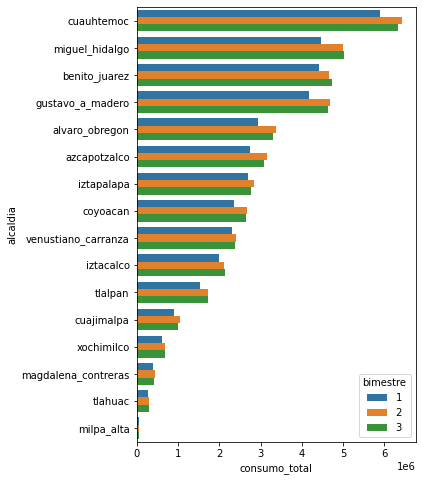

In [30]:
f = plt.subplots(figsize=(5, 8))

sns.barplot(y = "alcaldia", x = "consumo_total", hue = "bimestre", estimator = sum, data = data, ci = None,
order = ["cuauhtemoc", "miguel_hidalgo", "benito_juarez", "gustavo_a_madero", "alvaro_obregon", "azcapotzalco",
                     "iztapalapa", "coyoacan", "venustiano_carranza", "iztacalco", "tlalpan", "cuajimalpa", "xochimilco", "magdalena_contreras", "tlahuac", "milpa_alta"])

Como se puede apreciar, el consumo total no varía por bimestre. Para simplificar el análisis exploratorio, los 3 bimestres serán resumidos en uno sólo por medio del promedio. 
De esta manera, tendremos una sóla observación por manzana.

In [32]:
data_consumo_total_mean = data[['alcaldia', 'indice_des','colonia', 'latitud', 'longitud', 'consumo_total',\
                                      'consumo_total_dom', 'consumo_total_mixto', 'consumo_total_no_dom']].\
groupby(['alcaldia', 'indice_des','colonia', 'latitud', 'longitud']).mean().reset_index()

data_consumo_total_mean

,alcaldia,indice_des,colonia,latitud,longitud,consumo_total,consumo_total_dom,consumo_total_mixto,consumo_total_no_dom
0,alvaro_obregon,alto,1a_ampliacion_presidentes,19.373961,-99.225171,284.490000,168.243333,111.420000,4.826667
1,alvaro_obregon,alto,alcantarilla,19.336635,-99.250527,11499.083333,12.356667,0.000000,11486.703333
2,alvaro_obregon,alto,alfonso_xiii,19.374481,-99.198351,987.852000,265.098000,624.430000,98.324000
3,alvaro_obregon,alto,alfonso_xiii,19.374949,-99.193678,1046.280000,743.913333,29.560000,272.806667
4,alvaro_obregon,alto,alfonso_xiii,19.375100,-99.194926,710.683333,449.616667,65.246667,195.820000
...,...,...,...,...,...,...,...,...,...
23377,xochimilco,popular,tablas_de_san_lorenzo,19.246094,-99.106610,162.553333,0.000000,0.000000,162.553333
23378,xochimilco,popular,tejomulco_el_alto,19.240191,-99.087173,28.093333,0.000000,0.000000,28.093333
23379,xochimilco,popular,valle_de_santa_maria,19.234869,-99.096998,0.000000,0.000000,0.000000,0.000000
23380,xochimilco,popular,valle_de_santa_maria,19.235095,-99.097590,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='consumo_total', ylabel='alcaldia'>

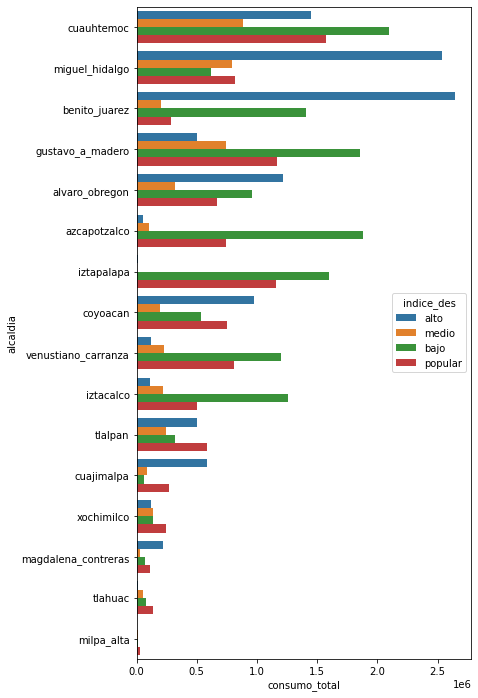

In [33]:
f = plt.subplots(figsize=(6, 12))

sns.barplot(y = "alcaldia", x = "consumo_total", hue = "indice_des", estimator = sum, data = data_consumo_total_mean, ci = None,
           order = ["cuauhtemoc", "miguel_hidalgo", "benito_juarez", "gustavo_a_madero", "alvaro_obregon", "azcapotzalco",
                     "iztapalapa", "coyoacan", "venustiano_carranza", "iztacalco", "tlalpan", "cuajimalpa", "xochimilco", "magdalena_contreras", "tlahuac", "milpa_alta"],
           hue_order = ['alto','medio','bajo','popular'])

<AxesSubplot:xlabel='consumo_total', ylabel='indice_des'>

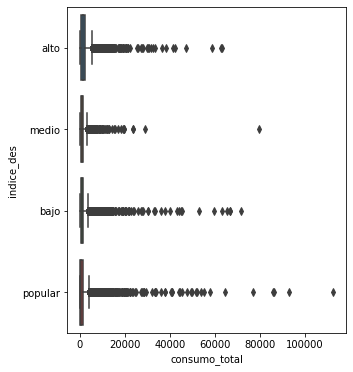

In [34]:
f = plt.subplots(figsize=(5, 6))
sns.boxplot(x = "consumo_total", y = "indice_des", order = ['alto','medio','bajo','popular'],
            data = data_consumo_total_mean)

<AxesSubplot:xlabel='consumo_total', ylabel='indice_des'>

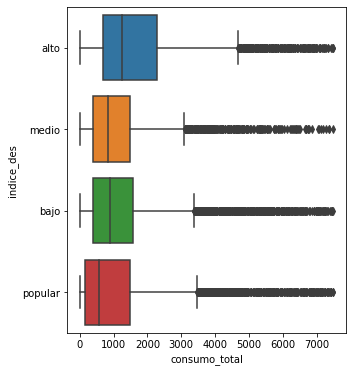

In [35]:
f = plt.subplots(figsize=(5, 6))
sns.boxplot(x = "consumo_total", y = "indice_des",order = ['alto','medio','bajo','popular'],
            data = data_consumo_total_mean[(data_consumo_total_mean.consumo_total < 7500) & (data_consumo_total_mean.consumo_total > 0)])

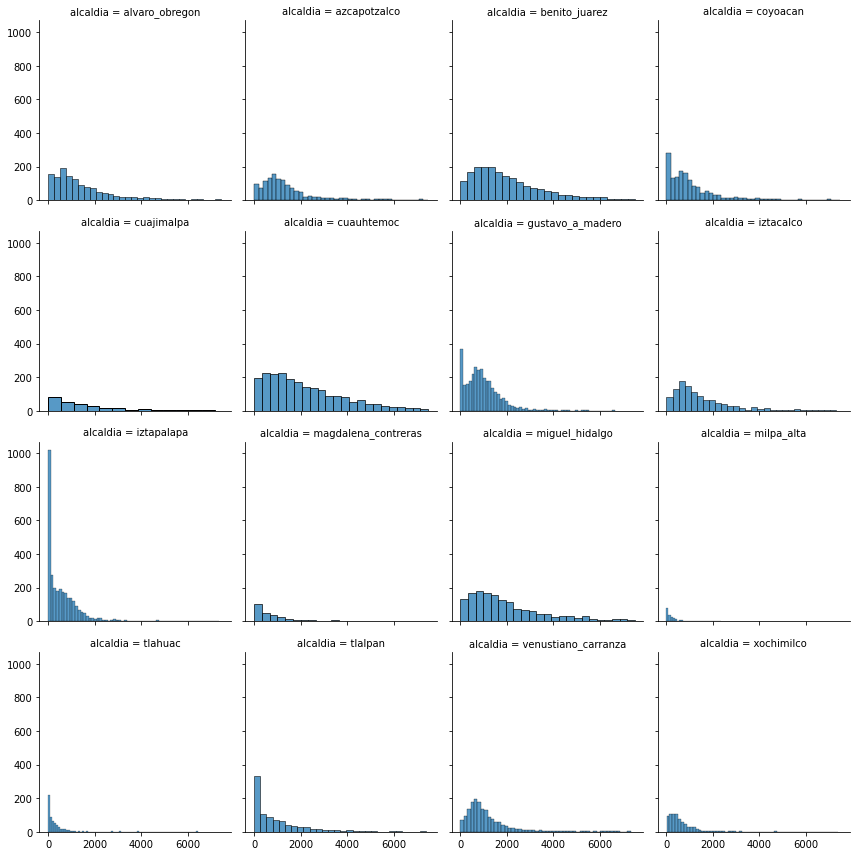

In [36]:
a = sns.FacetGrid(data = data_consumo_total_mean[(data_consumo_total_mean.consumo_total < 7500) &
                                                 (data_consumo_total_mean.consumo_total > 0)],
                  col = "alcaldia", col_wrap = 4, sharex = True, sharey = True)

a.map_dataframe(sns.histplot, x = "consumo_total")

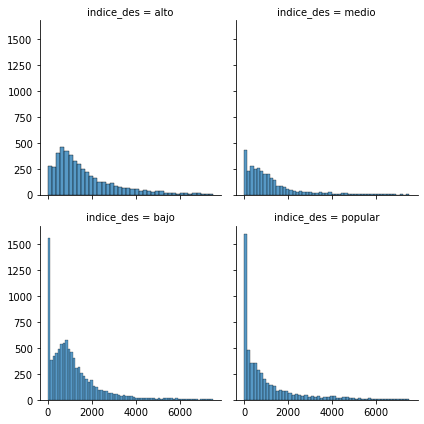

In [37]:
b = sns.FacetGrid(data = data_consumo_total_mean[data_consumo_total_mean.consumo_total < 7500],
                  col = "indice_des", col_wrap = 2, sharex = True, sharey = True, col_order = ['alto','medio', 'bajo','popular'])

b.map_dataframe(sns.histplot, x = "consumo_total")

In [38]:
consumo_total_alcaldia = data_consumo_total_mean.drop(['longitud', 'latitud'], axis = 1).groupby(['alcaldia']).sum().reset_index()

consumo_total_alcaldia['sum_col'] = consumo_total_alcaldia.consumo_total_dom + \
consumo_total_alcaldia.consumo_total_no_dom + \
consumo_total_alcaldia.consumo_total_mixto 

consumo_total_alcaldia['pct_dom'] = consumo_total_alcaldia.consumo_total_dom/ consumo_total_alcaldia.sum_col
consumo_total_alcaldia['pct_no_dom'] = consumo_total_alcaldia.consumo_total_no_dom/ consumo_total_alcaldia.sum_col
consumo_total_alcaldia['pct_mixto'] = consumo_total_alcaldia.consumo_total_mixto/ consumo_total_alcaldia.sum_col


consumo_total_alcaldia['acum_pct_no_dom'] = consumo_total_alcaldia.pct_dom + consumo_total_alcaldia.pct_no_dom
consumo_total_alcaldia['acum_pct_mixto'] = consumo_total_alcaldia.acum_pct_no_dom + consumo_total_alcaldia.pct_mixto

#consumo_total_alcaldia

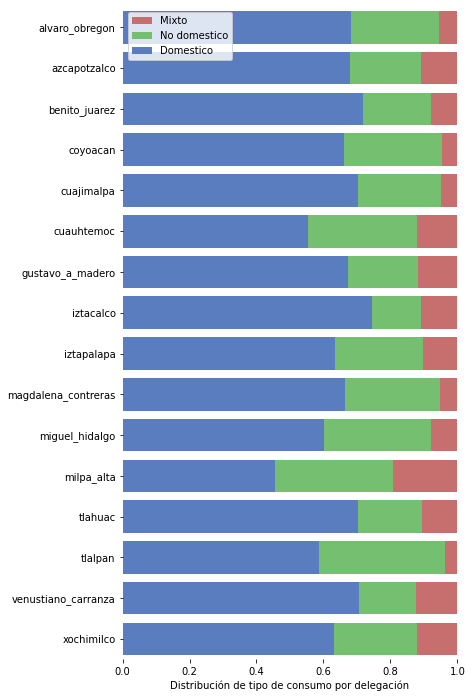

In [39]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 12))

#Mixto
sns.set_color_codes("muted")
sns.barplot(x="acum_pct_mixto", y="alcaldia", data=consumo_total_alcaldia,
            label="Mixto", color="r")

#No doméstico
sns.barplot(x="acum_pct_no_dom", y="alcaldia", data=consumo_total_alcaldia,
            label="No domestico", color="g")

#Doméstico
sns.barplot(x = "pct_dom", y = "alcaldia", data=consumo_total_alcaldia,
            label = "Domestico", color="b")


# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Distribución de tipo de consumo por delegación")
sns.despine(left=True, bottom=True)

In [40]:
consumo_total_indice_des = data_consumo_total_mean.drop(['longitud', 'latitud'], axis = 1).groupby(['indice_des']).sum().reset_index()

consumo_total_indice_des['sum_col'] = consumo_total_indice_des.consumo_total_dom + \
consumo_total_indice_des.consumo_total_no_dom + \
consumo_total_indice_des.consumo_total_mixto 

consumo_total_indice_des['pct_dom'] = consumo_total_indice_des.consumo_total_dom/ consumo_total_indice_des.sum_col
consumo_total_indice_des['pct_no_dom'] = consumo_total_indice_des.consumo_total_no_dom/ consumo_total_indice_des.sum_col
consumo_total_indice_des['pct_mixto'] = consumo_total_indice_des.consumo_total_mixto/ consumo_total_indice_des.sum_col


consumo_total_indice_des['acum_pct_no_dom'] = consumo_total_indice_des.pct_dom + consumo_total_indice_des.pct_no_dom
consumo_total_indice_des['acum_pct_mixto'] = consumo_total_indice_des.acum_pct_no_dom + consumo_total_indice_des.pct_mixto

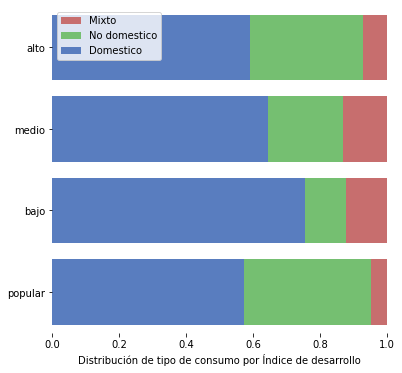

In [41]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

#Mixto
sns.set_color_codes("muted")
sns.barplot(x="acum_pct_mixto", y="indice_des", data=consumo_total_indice_des,
            label="Mixto", color="r", order = ['alto', 'medio', 'bajo', 'popular'])

#No doméstico
sns.barplot(x="acum_pct_no_dom", y="indice_des", data=consumo_total_indice_des,
            label="No domestico", color="g", order = ['alto', 'medio', 'bajo', 'popular'])

#Doméstico
sns.barplot(x = "pct_dom", y = "indice_des", data=consumo_total_indice_des,
            label = "Domestico", color="b", order = ['alto', 'medio', 'bajo', 'popular'])


# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Distribución de tipo de consumo por Índice de desarrollo")
sns.despine(left=True, bottom=True)

# Consumo promedio

En esta sección analizaremos el consumo promedio de las tres variables observadas para el total: consumo doméstico, no doméstico y mixto. 

### Consumo promedio doméstico por colonia. 

En la siguiente gráfica observamos que hay una variación considerable en el consumo doméstico por colonia. Colonias como Miguel Hidalgo o Álvaro Obregón tienen un nivel de consumo considerablemente mayor al de colonias como Tláhuac o Milpa Alta. 

Se decidió utilizar el promedio de los tres bimestres por fines de claridad y porque el consumo tuvo poca variación de bimestre a bimestre en cada colonia (lo cual se mostrará en la siguiente gráfica). 

![Consumo Promedio Doméstico](plots/consumo_promedio/BARRAS_PROMEDIO_DOMESTICO_V2.png)

El conjunto de datos no presenta unidades, pero el promedio del consumo promedio doméstico por colonia es de 29.29 unidades, con una desviación estándar de 8.65 unidades, un mínimo de 14.8 (Milpa Alta) y un máximo de 43 (Miguel Hidalgo). 

### Consumo promedio no doméstico por colonia

A continuación observamos la misma gráfica para el promedio del consumo no doméstico. 

![Consumo Promedio Doméstico](plots/consumo_promedio/BARRAS_PROMEDIO_NO_DOMESTICO_V2.png)

Es interesante notar que algunas colonias, como Tlalpan o Cuauhtémoc, no son preponderantes en el consumo doméstico pero sí en el no doméstico. Esto es lo que habríamos de esperar, pues xisten zonas residenciales y zonas industriales en el país. 

El promedio del consumo no doméstico es de 129 unidades, más de 4 veces el promedio del consumo doméstico. La varianza es mayor en este caso: con una desviación estándar de 70 unidades, observamos colonias como Tláhuac, que cuenta con tan solo 40 unidades de consumo y colonias como Tlalpan, con 278 unidades de consumo en promedio para los tres bimestres. 

### Consumo promedio mixto por colonia. 

El consumo mixto está definido como aquel que ocurre en zonas donde simultáneamente se usa el agua para consumo doméstico y no doméstico. ¿Cómo se ve la distribución por colonia en en este caso? 

![Consumo Promedio Doméstico](plots/consumo_promedio/BARRAS_PROMEDIO_MIXTO_V2.png)

En este caso, el mínimo es de 16.63 unidades y el máximo de 98.25. El promedio del consumo promedio mixto de agua es de 46 unidades. 

La siguiente tabla, que muestra el ranking de cada colonia en estos tres rubros, nos permite ver que algunas colonias, como Miguel Hidalgo o Cuajimalpa, tienen una actividad importante en estos tres campos, mientras que otras, como Milpa Alta y Tláhuac, tienen un consumo relativamente bajo. Por supuesto, existen otras, como Cuahutémoc o Tlalpan, que tienen un consumo alto en algunas categorías y bajo en otras. 

| Colonia | Ranking Doméstico | Ranking No Doméstico| Ranking Mixto |
| --- | --- | --- | --- |
| Miguel Hidalgo | 1| 2 |  2 |
| Álvaro Obregón | 2| 5 |  5 |
| La Magdalena Contreras | 3| 8 | 11 |
| Cuajimalpa de Morelos | 4| 3 |  3 |
| Azcapotzalco | 5| 7 |  7 |
| Iztacalco| 6| 11 |  8 |
| Venustiano Carranza | 7| 12 |  6 |
| Gustavo A. Madero | 8| 10 |  9 |
| Coyoacán | 9| 6 |  10 |
| Tlalpan | 10| 1 |  12 |
| Cuauhtémoc | 11| 4 |  1 |
| Benito Juárez | 12| 9 |  4 |
| Xochimilco | 13| 14 |  14 |
| Iztapalapa| 14| 13 |  13 |
| Tláhuac | 15| 16 |  15 |
| Milpa Alta | 16| 15 |  16 |

En la siguiente gráfica podemos también resumir la diferencia en distribuciones por estos tres tipos de consumo:

![Consumo Promedio Doméstico](plots/consumo_promedio/COMPARACION_TRIPARTITA.png)

En la siguiente gráfica podemos observar que el consumo promedio, tanto del sector doméstico como del no doméstico, tuvo pocos cambios de bimestre a bimestre. El consumo mixto disminuyó de 67 a 45 unidades del primer al segundo bimestre pero después se mantuvo estable.

![Consumo Promedio Doméstico](plots/consumo_promedio/COMPARACION_TRES_BIM.png)

### Distribución del consumo promedio por índice de desarrollo.

Curiosamente, a pesar de que algunas colonias tienen un consumo mucho mayor que otras, podemos notar que sus distribuciones son relativamente similares, con un medianta cercana a las 28 unidades. Es relevante también mencionar que el sector con índice de desarrollo popular tiene una varianza mayor en su consumo promedio de agua. 

![Consumo Promedio Doméstico](plots/consumo_promedio/Domestico_DES_boxplot.png)

Para el sector no doméstico, las distribuciones varían un poco más. Notamos que el sector con alto índice de desarrollo tiene una mediana notablemente mayor que la de los demás sectores, aunque sigue siendo cierto que el sector popular tiene mayor varianza en su consumo promedio. 

![Consumo Promedio Doméstico](plots/consumo_promedio/NO_Dom_DES_BoxPlot.png)

Finalmente, realizamos el mismo análisis para el consumo mixto.

![Consumo Promedio Doméstico](plots/consumo_promedio/MIXTO_BOXPLOT.png)

# Características de los datos para la definición de un modelo

Argumentos: consideramos que información no es suficiente ni completa para predecir un modelo correcto. Nos gustaría contar con información adicional como número de tomas (para controlar), tarifa promedio, entre otros...

Variables que nos servirían para predecir idh: consumo promedio, tipo de consumo y su proporción, ubicación (alcaldía).